In [1]:
from keras.datasets import cifar10
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

import matplotlib.pyplot as plt

from google.colab import files

import numpy as np

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = cifar10.load_data()

Using TensorFlow backend.


In [0]:
data_images = train_images_original
test_images = test_images_original

data_labels = train_labels_original
test_labels = test_labels_original

In [0]:
data_size = len(data_images)
train_size = int(data_size * 0.8)

shuffled_i = np.random.permutation(data_size)
data_images = data_images[shuffled_i]
data_labels = data_labels[shuffled_i]

train_images = data_images[:train_size]
val_images = data_images[train_size:]

train_labels = data_labels[:train_size]
val_labels = data_labels[train_size:]

In [0]:
batches = 128
train_steps = int(40000/batches)
val_steps = int(10000/batches)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(
    train_images,
    train_labels,
    batch_size=batches,
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow(
    val_images,
    val_labels,
    batch_size=batches,
)

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)  

In [0]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=val_steps
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
312/312 [==============================] - 29s 94ms/step - loss: 2.1354 - acc: 0.1924 - val_loss: 1.9534 - val_acc: 0.2885
Epoch 2/50
312/312 [==============================] - 26s 85ms/step - loss: 1.9517 - acc: 0.2762 - val_loss: 1.8266 - val_acc: 0.3345
Epoch 3/50
312/312 [==============================] - 27s 85ms/step - loss: 1.8908 - acc: 0.2984 - val_loss: 1.7520 - val_acc: 0.3673
Epoch 4/50
312/312 [==============================] - 27s 86ms/step - loss: 1.8322 - acc: 0.3241 - val_loss: 1.7818 - val_acc: 0.3377
Epoch 5/50
312/312 [==============================] - 27s 86ms/step - loss: 1.7958 - acc: 0.3384 - val_loss: 1.6505 - val_acc: 0.3988
Epoch 6/50
312/312 [==============================] - 27s 87ms/step - loss: 1.7625 - acc: 0.3507 - val_loss: 1.6036 - val_acc: 0.4157
Epoch 7/50
312/312 [==============================] - 27s 86ms/step - loss: 1.7380 - acc: 0.3639 - val_loss: 1.6244 - val_acc: 0.4128
Epoch 8/50
312

In [0]:
model.save('model_dropout_aug.h5')

with open('model_dropout_aug.h5', 'r') as f:
  files.download('model_dropout_aug.h5')

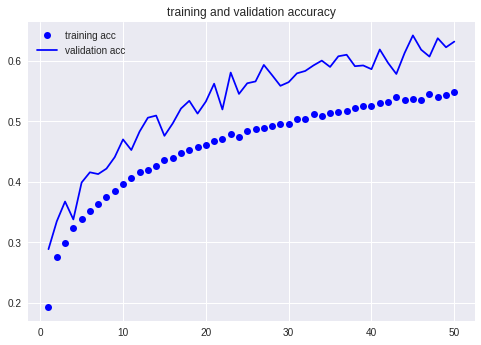

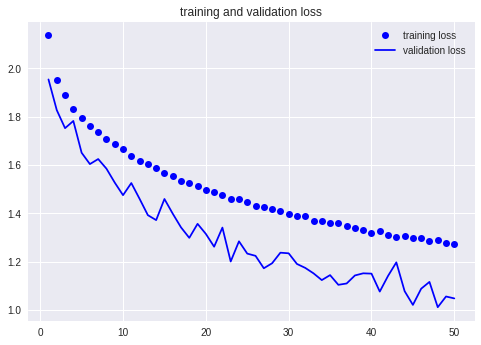

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()